In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# IMPORTING AND STORING THE DATA IN A DATAFRAME

In [2]:
url = 'http://users.stat.ufl.edu/~winner/data/airq402.dat' 

df = pd.read_csv(url ,sep = '\s+' , names = ['City1','City2','Average Fare','Distance','Average weekly passengers',
                                             'market leading airline','market share','Average fare','Low price airline',
                                             'market share','price']) 
df

C:\Users\vamsi\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [3]:
df.columns

Index(['City1', 'City2', 'Average Fare', 'Distance',
       'Average weekly passengers', 'market leading airline', 'market share',
       'Average fare', 'Low price airline', 'market share.1', 'price'],
      dtype='object')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
market share.1,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [5]:
df.dtypes

City1                         object
City2                         object
Average Fare                 float64
Distance                       int64
Average weekly passengers    float64
market leading airline        object
market share                 float64
Average fare                 float64
Low price airline             object
market share.1               float64
price                        float64
dtype: object

In [6]:
df.median()

Average Fare                 161.345
Distance                     919.000
Average weekly passengers    404.780
market share                  59.240
Average fare                 161.400
market share.1                26.140
price                        137.825
dtype: float64

# REMOVING THE OUTLIERS FROM DATA

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

IQR , Q1 , Q3


(Average Fare                  71.4175
 Distance                     899.0000
 Average weekly passengers    512.7150
 market share                  27.0000
 Average fare                  78.8925
 market share.1                39.7775
 price                         54.7625
 dtype: float64, Average Fare                 125.9750
 Distance                     553.5000
 Average weekly passengers    257.1975
 market share                  46.5100
 Average fare                 124.0850
 market share.1                13.1950
 price                        113.7675
 Name: 0.25, dtype: float64, Average Fare                  197.3925
 Distance                     1452.5000
 Average weekly passengers     769.9125
 market share                   73.5100
 Average fare                  202.9775
 market share.1                 52.9725
 price                         168.5300
 Name: 0.75, dtype: float64)

In [8]:
min = Q1 - (IQR * 1.5)

min

Average Fare                  18.84875
Distance                    -795.00000
Average weekly passengers   -511.87500
market share                   6.01000
Average fare                   5.74625
market share.1               -46.47125
price                         31.62375
dtype: float64

In [9]:
max = Q3 + (IQR * 1.5) 

max

Average Fare                  304.51875
Distance                     2801.00000
Average weekly passengers    1538.98500
market share                  114.01000
Average fare                  321.31625
market share.1                112.63875
price                         250.67375
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xb206710>,
 'caps': [<matplotlib.lines.Line2D at 0xb206f60>,
 'boxes': [<matplotlib.lines.Line2D at 0xb206198>],
 'medians': [<matplotlib.lines.Line2D at 0xb2157f0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb215c18>],
 'means': []}

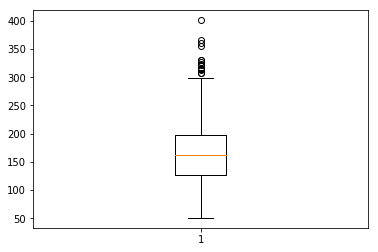

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(df['Average Fare'])

In [11]:
for i,j,k in zip(min.index.tolist(),min,max):
     df=df[((df[i]>j) & (df[i]<k))] 
    
df.shape

(885, 11)

# TREATING "AVERAGE FARE" COLUMN AS DEPENDENT AND REST AS INDEPENDENT VARIABLES

In [12]:
Target = df['Average Fare']

In [13]:
Feature = df.drop('Average Fare',axis=1)

In [14]:
Feature.head()

,City1,City2,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# DROPPING INDEPENDENT VARIABLES WHICH HAS <0.1 CORRELATION WITH DEPENDENT VARIABLE

In [15]:
df.corr()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
Average Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average weekly passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Average fare,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market share.1,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


In [16]:
correlation = df.corr()['Average Fare']>0.1
print(correlation)

Average Fare                  True
Distance                      True
Average weekly passengers    False
market share                 False
Average fare                  True
market share.1               False
price                         True
Name: Average Fare, dtype: bool


In [17]:
drop_col=correlation[correlation==False].index
drop_col

Index(['Average weekly passengers', 'market share', 'market share.1'], dtype='object')

In [18]:
Feature = Feature.drop(columns=drop_col)
Feature

,City1,City2,Distance,market leading airline,Average fare,Low price airline,price
0,CAK,ATL,528,FL,111.03,FL,111.03
1,CAK,MCO,860,FL,123.09,DL,118.94
2,ALB,ATL,852,DL,223.98,CO,167.12
3,ALB,BWI,288,WN,68.86,WN,68.86
4,ALB,ORD,723,UA,161.36,WN,145.42
5,ALB,FLL,1204,WN,137.97,DL,127.69
6,ALB,LAS,2237,WN,148.59,WN,148.59
7,ALB,LAX,2467,DL,205.06,US,174.00
8,ALB,MCO,1073,WN,127.69,WN,127.69
9,ALB,TPA,1130,US,132.91,DL,124.78


In [19]:
Feature.shape

(885, 7)

# CREATING SCATTER PLOT OF INDEPENDENT VS DEPENDENT VARIABLE 

In [20]:
import seaborn as sns

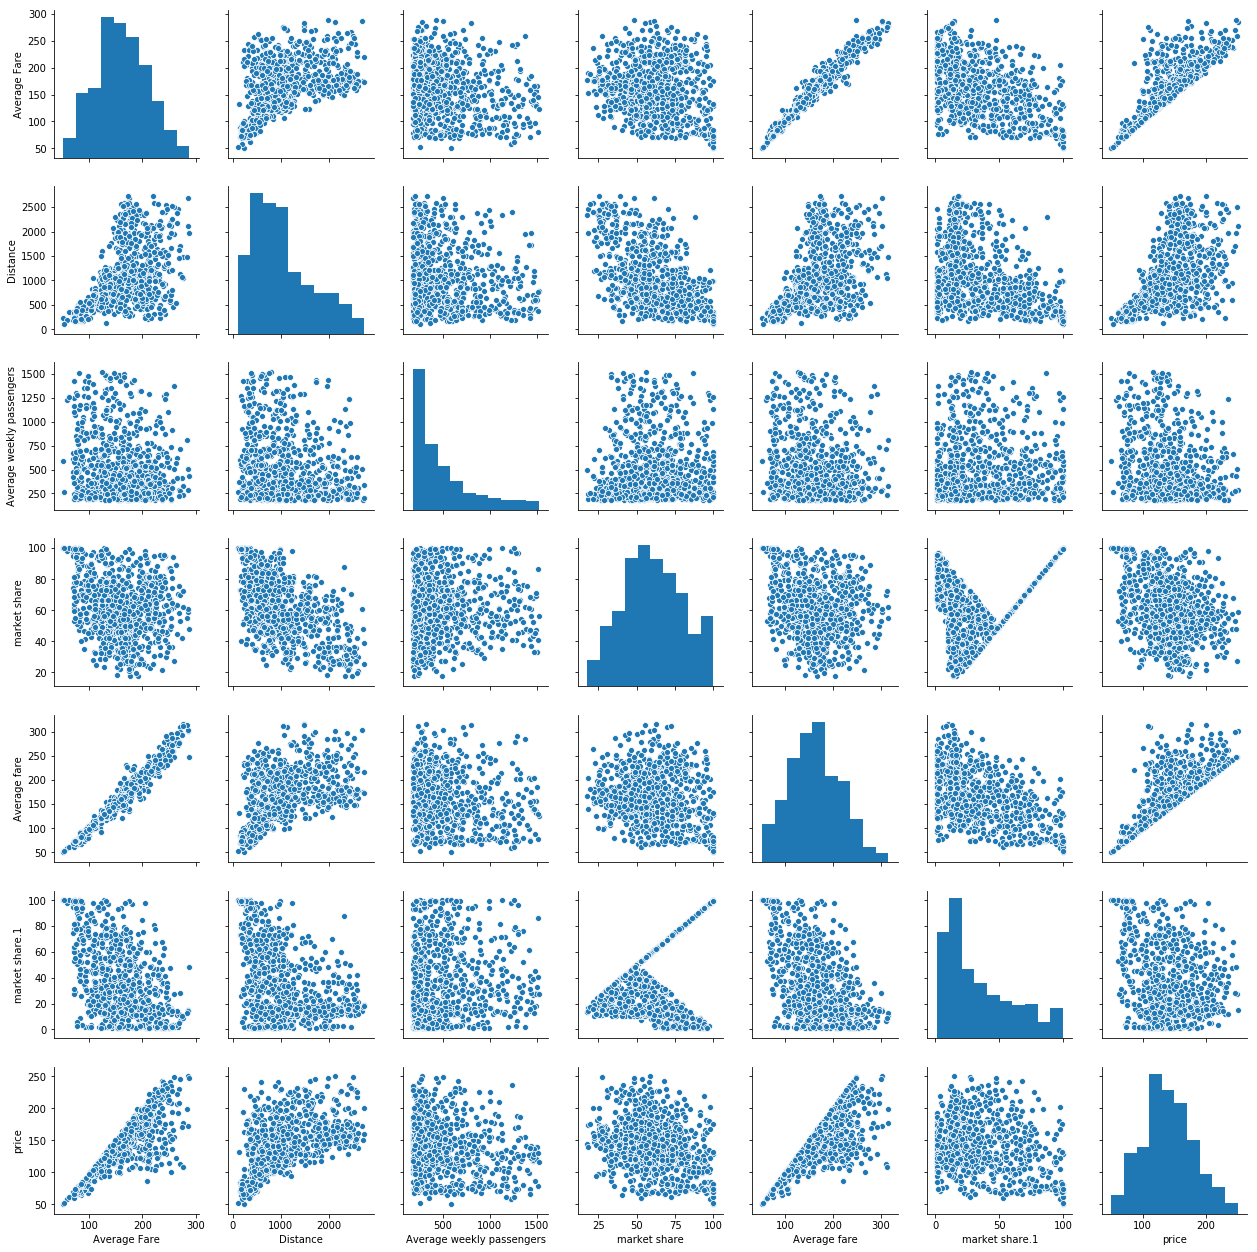

In [21]:
sns.pairplot(df)

In [22]:
import matplotlib.pyplot as plt

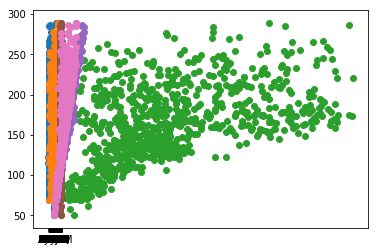

In [23]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.scatter(Feature['City1'],Target)
ax.scatter(Feature['City2'],Target)
ax.scatter(Feature['Distance'],Target)
ax.scatter(Feature['market leading airline'],Target)
ax.scatter(Feature['Average fare'],Target)
ax.scatter(Feature['Low price airline'],Target)
ax.scatter(Feature['price'],Target)

# CHANGING OF CATEGORICAL VARIABLES

In [24]:
Feature['one_two_cols'] = Feature['City1']+"-"+Feature['City2']
Feature['one_two_cols'].head()

0    CAK-ATL
1    CAK-MCO
2    ALB-ATL
3    ALB-BWI
4    ALB-ORD
Name: one_two_cols, dtype: object

In [25]:
Feature.head()

,City1,City2,Distance,market leading airline,Average fare,Low price airline,price,one_two_cols
0,CAK,ATL,528,FL,111.03,FL,111.03,CAK-ATL
1,CAK,MCO,860,FL,123.09,DL,118.94,CAK-MCO
2,ALB,ATL,852,DL,223.98,CO,167.12,ALB-ATL
3,ALB,BWI,288,WN,68.86,WN,68.86,ALB-BWI
4,ALB,ORD,723,UA,161.36,WN,145.42,ALB-ORD


In [26]:
Feature=Feature.drop(columns=['City1','City2'])


In [27]:
Feature.head()

,Distance,market leading airline,Average fare,Low price airline,price,one_two_cols
0,528,FL,111.03,FL,111.03,CAK-ATL
1,860,FL,123.09,DL,118.94,CAK-MCO
2,852,DL,223.98,CO,167.12,ALB-ATL
3,288,WN,68.86,WN,68.86,ALB-BWI
4,723,UA,161.36,WN,145.42,ALB-ORD


In [28]:
Feature.insert(0,'one-two-cols',Feature['one_two_cols'])

Feature=Feature.drop(columns='one_two_cols')

In [29]:
Feature.head()

,one-two-cols,Distance,market leading airline,Average fare,Low price airline,price
0,CAK-ATL,528,FL,111.03,FL,111.03
1,CAK-MCO,860,FL,123.09,DL,118.94
2,ALB-ATL,852,DL,223.98,CO,167.12
3,ALB-BWI,288,WN,68.86,WN,68.86
4,ALB-ORD,723,UA,161.36,WN,145.42


In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(Feature['one-two-cols'])

LabelEncoder()

In [32]:
Feature['one-two-cols']=le.transform(Feature['one-two-cols'])

In [33]:
Feature.head()

,one-two-cols,Distance,market leading airline,Average fare,Low price airline,price
0,241,528,FL,111.03,FL,111.03
1,242,860,FL,123.09,DL,118.94
2,22,852,DL,223.98,CO,167.12
3,23,288,WN,68.86,WN,68.86
4,28,723,UA,161.36,WN,145.42


In [34]:
Feature=pd.get_dummies(Feature)

In [35]:
Feature.head()

,one-two-cols,Distance,Average fare,price,market leading airline_AA,market leading airline_AS,market leading airline_B6,market leading airline_CO,market leading airline_DL,market leading airline_F9,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,241,528,111.03,111.03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,242,860,123.09,118.94,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,852,223.98,167.12,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,23,288,68.86,68.86,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,723,161.36,145.42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# SPLITTING OF DATA

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Feature,Target,random_state=1)

In [39]:
X_train.shape

(663, 38)

In [40]:
X_test.shape

(222, 38)

In [41]:
y_train.shape

(663,)

In [42]:
y_test.shape

(222,)

# COEFFICIENTS AND INTERCEPTS

In [44]:
from sklearn.linear_model import LinearRegression

Regression_model = LinearRegression()
Regression_model.fit(X_train , y_train)
Regression_model.coef_



array([ 1.86120468e-03,  1.82709723e-03,  7.68407951e-01,  1.91286016e-01,
       -7.67877606e-01, -5.62448191e+00,  1.34127174e+01, -6.75236127e+00,
       -1.21911579e+00,  1.52891657e+01,  1.40799703e+00, -2.66453526e-15,
       -5.46085801e+00,  4.47750241e+00, -2.24636752e+00,  4.97044651e+00,
       -8.72776868e+00, -1.73213998e+00, -2.97782904e+00, -4.04902919e+00,
        1.38096739e+00,  3.28922685e+00,  1.00266139e+01, -1.02884763e+01,
        3.94152616e+00,  6.96562511e-01, -1.59988346e+00, -1.43365442e+00,
        4.44089210e-15,  5.73788014e-01, -5.37438593e+00,  2.45739990e+00,
       -5.27736708e+00, -3.87164717e+00,  1.20318322e+00,  2.60336774e+00,
        9.66891636e-01,  7.05887005e-01])

In [45]:
Regression_model.intercept_

7.280195167785763

In [46]:
ypred=Regression_model.predict(X_test)

In [47]:
ypred.shape

(222,)

In [49]:
y_test.shape

(222,)

In [51]:
Regression_model.score(X_train,y_train)

0.9746855094036221

# ACCURACY OF A MODEL

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.9752865547201635